In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [34]:
start='2010-01-01'
end='2019-12-31'

df = yf.download('AAPL', start=start, end=end)

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.454504,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.465666,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.351058,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.393280,7.570714,7.571429,7.466429,7.510714,447610800


In [35]:
df=df.reset_index()

df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04 00:00:00+00:00,6.454504,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05 00:00:00+00:00,6.465666,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07 00:00:00+00:00,6.351058,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08 00:00:00+00:00,6.393280,7.570714,7.571429,7.466429,7.510714,447610800


In [36]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

C:\Users\ph123\AppData\Local\Temp\ipykernel_43476\3340523055.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date','Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


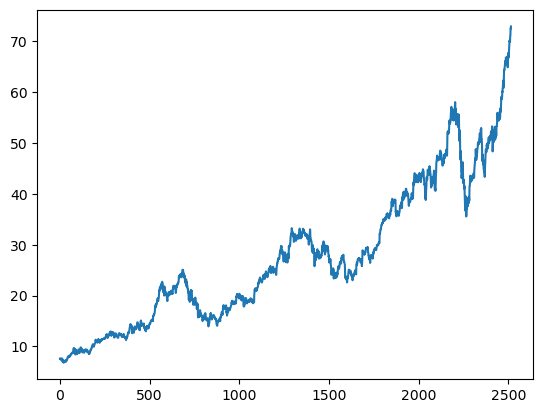

In [37]:
plt.plot(df.Close)

In [38]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


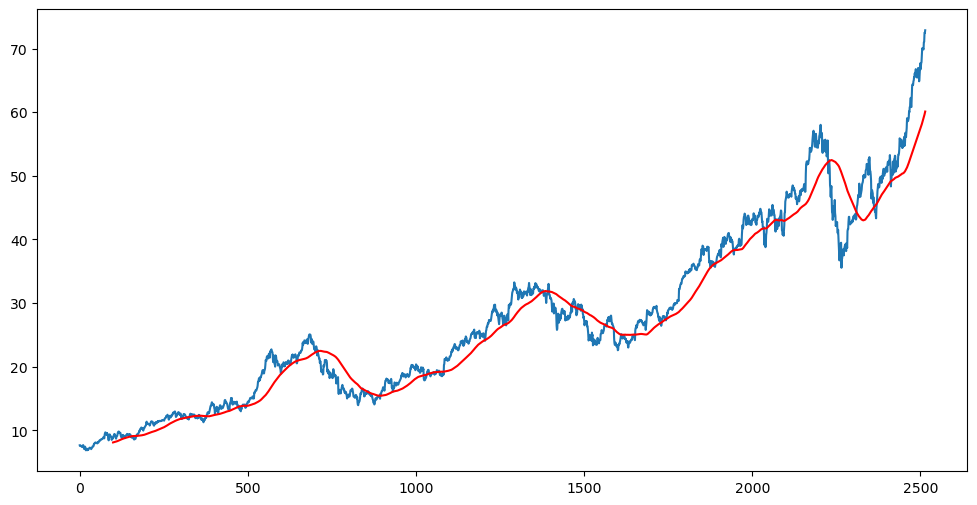

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [40]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,54.132313
2511,54.261513
2512,54.396763
2513,54.529350


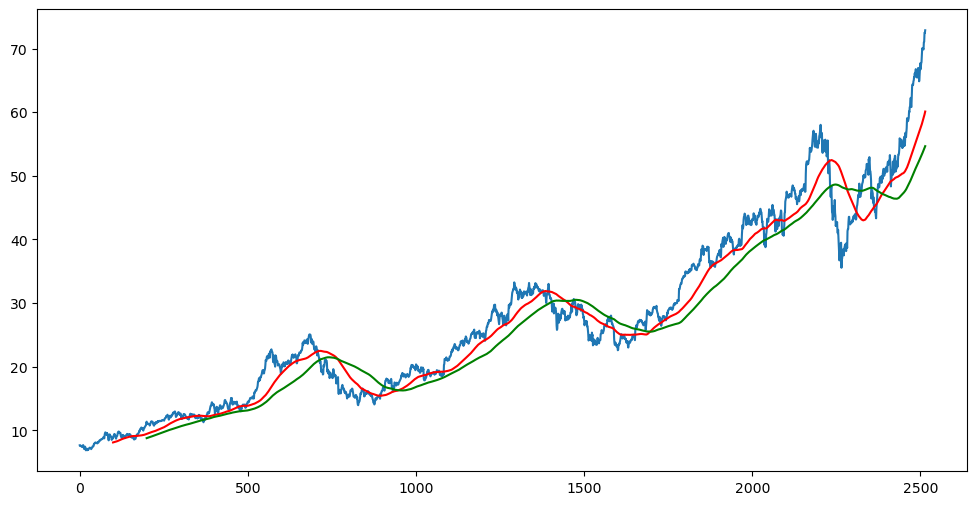

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [42]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

In [43]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [44]:
data_testing.head()

Ticker,AAPL
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [46]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [47]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i:0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [48]:
!pip install tensorflow

In [49]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [50]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\ph123\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 383ms/step - loss: nan
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 359ms/step - loss: nan
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - loss: nan
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - loss: nan
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 359ms/step - loss: nan
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - loss: nan
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - loss: nan
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 390ms/step - loss: nan
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 367ms/step - loss: nan
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - loss: nan
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 355ms/step - loss: nan
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 366ms/step - loss: nan
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - loss: nan
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 359ms/step - loss: nan
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - loss: nan
Epoch 16/50
52/52 ━

In [73]:
model.save('keras_model.h5')

In [78]:
past_100_days=data_training.tail(100)

In [91]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [100]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)


In [104]:
y_predicted=model.predict(x_test)
y_predicted.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


(755, 1)

In [110]:
scaler.scale_

array([0.02123255])

In [ ]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

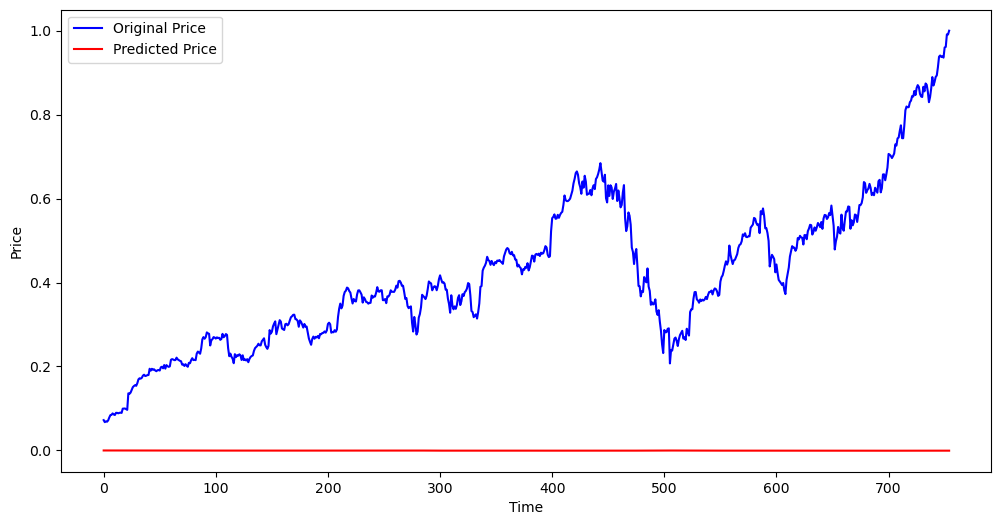

In [115]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()